In [1]:
import time
import hashlib
import math

In [2]:
import nbimporter
import utils

Importing Jupyter notebook from utils.ipynb


#### CREATE PASSWORDS

In [3]:
permutations = utils.generate_passwords(length=2)

#### PROCESS WITH RECURSIVE HASHING -- CPU BOUND

In [4]:
def hash_recurs(input_string, n_times=4000):
    
    # FORMAT
    encoder_format = 'utf-8'
    
    # ENCODE INITIAL DATA
    output = input_string.encode(encoder_format)
    
    # HASH RECURSIVELY
    for _ in range(n_times):
        output = hashlib.sha256(output).hexdigest().encode(encoder_format)
        
    return output.decode(encoder_format)

#### BASELINE

In [16]:
utils.baseline(
    func=hash_recurs,
    params=permutations
)

TOTAL:	 3.963
AVG:	 0.003


#### PARALLEL

In [18]:
utils.wrapper(
    func=hash_recurs,
    params=permutations,
    parallel=True
)

TOTAL:	 0.722
AVG:	 0.001


#### THREADING

In [19]:
utils.wrapper(
    func=hash_recurs,
    params=permutations,
    parallel=False
)

TOTAL:	 4.939
AVG:	 0.004


In [23]:
import random
import string

In [30]:
def generate_datasets(lengths):
    
    # CHARSET FOR RANDOM WORD
    charset = string.ascii_lowercase
    dataset = []
    
    for dataset_length in lengths:
        temp = []
        
        for word_count in range(dataset_length):
            word = ''.join(random.choice(charset) for i in range(5))
            temp.append(word)
            
        dataset.append(temp)
        
    return dataset

In [66]:
def create_jumps(n_jumps):
    
    # HELPERS
    container = [10]
    current = 10
    
    # REPEATEDLY MULTIPLY BY 2
    for _ in range(n_jumps-1):
        current *= 2
        container.append(current)
        
    return container

In [67]:
def foobar(n_rounds):
    
    # CREATE JUMPS & DATASETS
    jumps = create_jumps(n_rounds)
    datasets = generate_datasets(jumps)
    
    # RESULT CONTAINER
    results = []
    
    for dataset in datasets:
        time_taken = utils.wrapper(
            func=hash_recurs,
            params=dataset,
            parallel=True
        )
        
        print('NTH ROUND:\t', time_taken)
        
        results.append(time_taken)
        
    return results

In [73]:
dataset = foobar(15)

NTH ROUND:	 0.097
NTH ROUND:	 0.112
NTH ROUND:	 0.12
NTH ROUND:	 0.141
NTH ROUND:	 0.171
NTH ROUND:	 0.264
NTH ROUND:	 0.423
NTH ROUND:	 0.762
NTH ROUND:	 1.387
NTH ROUND:	 2.693
NTH ROUND:	 5.284
NTH ROUND:	 10.401
NTH ROUND:	 20.647
NTH ROUND:	 40.698
NTH ROUND:	 81.465


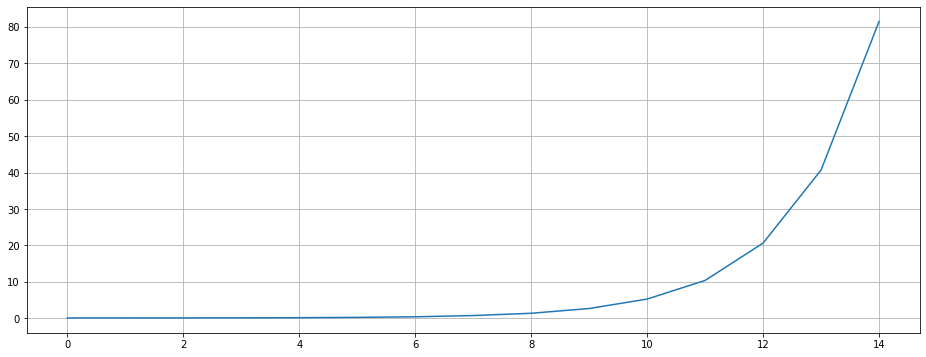

In [74]:
utils.plt_visualize(dataset)

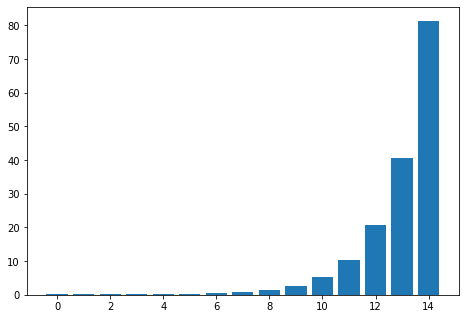

In [75]:
bar_chart(dataset)

In [15]:
import matplotlib.pyplot as plt

In [16]:
def bar_chart(dataset):
    
    labels = [x for x in range(len(dataset))]
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    ax.bar(labels, dataset)
    plt.show()

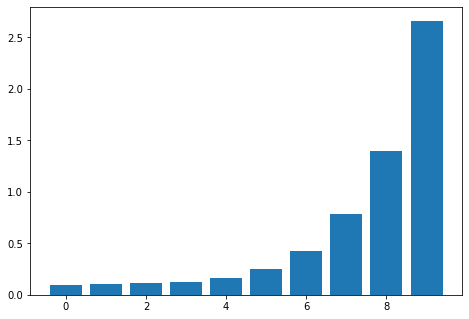

In [71]:
bar_chart(dataset)